<a href="https://colab.research.google.com/github/Shivachowdoju/Langgraph/blob/main/Tutorial1_LangGraph_ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [3]:
!pip install langchain_groq langchain_community

  Using cached langchain_groq-0.1.9-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.2 MB/s eta 0:00:00


In [8]:
from google.colab import userdata
groq = userdata.get('Groq')

In [9]:
from google.colab import userdata
langsmith = userdata.get('Langsmith')

In [11]:
import os
os.environ["Langsmith"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]= "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [12]:
from langchain_groq import ChatGroq

In [14]:
llm = ChatGroq(groq_api_key=groq,model_name="Gemma2-9b-it")

In [15]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a0403c155a0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a0403c16260>, model_name='Gemma2-9b-it', groq_api_key=SecretStr('**********'))

In [17]:
## start building chatbot using langgraph

In [18]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [22]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [23]:
graph_builder

In [24]:
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [25]:
graph_builder.add_node("chatbot",chatbot)

In [26]:
graph_builder

In [27]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [28]:
graph =graph_builder.compile()

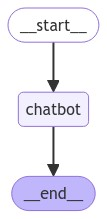

In [30]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("user:")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

user:hello


LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')


dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nWhat can I do for you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 15, 'total_tokens': 32, 'completion_time': 0.032930963, 'prompt_time': 0.002325139, 'queue_time': None, 'total_time': 0.035256102}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-12c37031-2d49-4480-90a8-4df281c9ec08-0', usage_metadata={'input_tokens': 15, 'output_tokens': 17, 'total_tokens': 32})}])
content='Hello! 👋 \n\nWhat can I do for you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 15, 'total_tokens': 32, 'completion_time': 0.032930963, 'prompt_time': 0.002325139, 'queue_time': None, 'total_time': 0.035256102}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-12c37031-2d49-4480-90a8-4df281c9ec08-0' usage_metadata={'input_tokens'

LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')


dict_values([{'messages': AIMessage(content="##  Gen AI: The Creative Spark of Artificial Intelligence\n\nGen AI, short for **Generative Artificial Intelligence**, is a fascinating branch of AI focused on **creating new content**. Think of it as the artistic side of AI, capable of producing original text, images, audio, video, code, and even 3D models. \n\nHere's a breakdown:\n\n**How it works:**\n\nGen AI models are trained on massive datasets of existing content. This allows them to learn patterns, structures, and styles within that data. \n\nThen, when given a prompt or set of instructions, they use this learned knowledge to generate something entirely new, while staying within the learned style and context.\n\n**Examples of Gen AI in action:**\n\n* **Text Generation:** Chatbots like me, writing stories, poems, articles, and even code.\n* **Image Generation:** Creating realistic images from text descriptions (think DALL-E 2 or Midjourney), designing logos, or generating art.\n* **Au

LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')
LangSmithUserError('API key must be provided when using hosted LangSmith API')


dict_values([{'messages': AIMessage(content='I do not have access to real-time information, including personal details about individuals like Joshna Seelam. \n\nTo find information about this person, I recommend using a search engine like Google. You can also try searching on social media platforms like LinkedIn, Facebook, or Twitter. \n\n', response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 21, 'total_tokens': 83, 'completion_time': 0.126543332, 'prompt_time': 0.002380709, 'queue_time': None, 'total_time': 0.12892404100000002}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-c020dfff-57f5-44eb-8e0e-06c61e45c632-0', usage_metadata={'input_tokens': 21, 'output_tokens': 62, 'total_tokens': 83})}])
content='I do not have access to real-time information, including personal details about individuals like Joshna Seelam. \n\nTo find information about this person, I recommend using a search engin